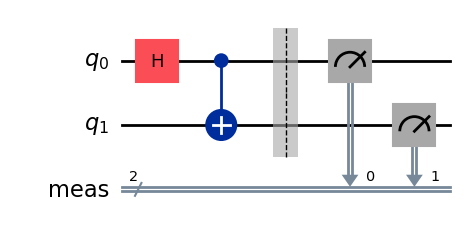

In [1]:
from qiskit import QuantumCircuit

# Create a new circuit with two qubits
qc = QuantumCircuit(2)
 
# Add a Hadamard gate to qubit 0
qc.h(0)

 
# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Add a measurement to both qubits
qc.measure_all()
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
# These guides are written by using Jupyter notebooks, which
# display the output of the last line of each cell.
# If you're running this in a script, use `print(qc.draw())` to
# print a text drawing.
qc.draw("mpl")

In [3]:
import os
from qiskit_aer import Aer
from qiskit_ibm_runtime import QiskitRuntimeService

api_token = os.environ["IBM_API_KEY"]
CRN = os.environ["CRN"]
service = QiskitRuntimeService.save_account(token=api_token, overwrite=True, set_as_default=True,channel = 'ibm_cloud', instance=CRN)
print("Service account saved successfully.")

Service account saved successfully.


In [4]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

service = QiskitRuntimeService(channel='ibm_cloud', instance=CRN)
backend = service.least_busy(operational=True, simulator=False)
print(f"Using backend: {backend.name}")

Using backend: ibm_brisbane


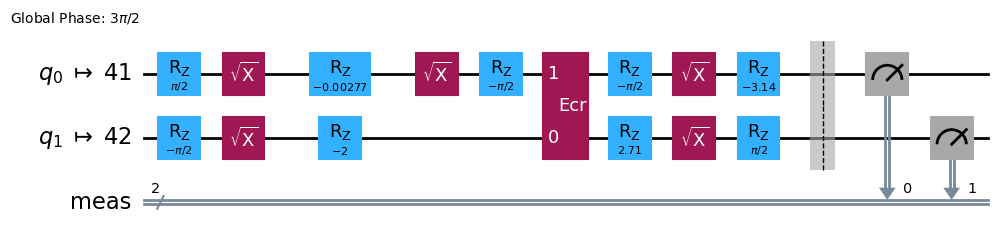

In [8]:
# Generate a preset pass manager for the Aer simulator
pm = generate_preset_pass_manager(optimization_level=2, backend=backend, target=backend.target)

# Transpile the circuit using the preset pass manager
transpiled_circuit = pm.run(qc)

# Print the transpiled circuit
transpiled_circuit.draw("mpl", idle_wires=False, style="iqp")

Job ID: d2cbo4q5v10c73bvv3jg


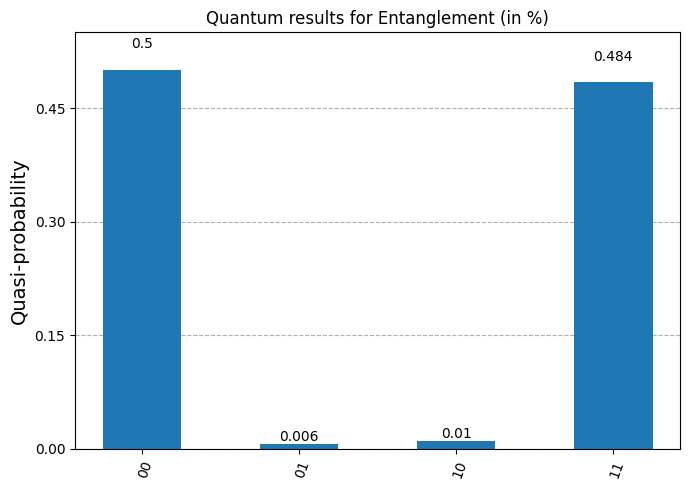

In [ ]:
from qiskit_ibm_runtime import SamplerV2, Sampler
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_distribution

sampler = Sampler(mode=backend)
sampler.options.dynamical_decoupling.enable = True
sampler.options.twirling.enable_gates = True

job = sampler.run([transpiled_circuit], shots=500)
id = job.job_id()
print(f"Job ID: {id}")
result_ideal = job.result()
counts_ideal = result_ideal[0].data.meas.get_counts()
plot_distribution(counts_ideal, title="Quantum results for Entanglement (in %)")

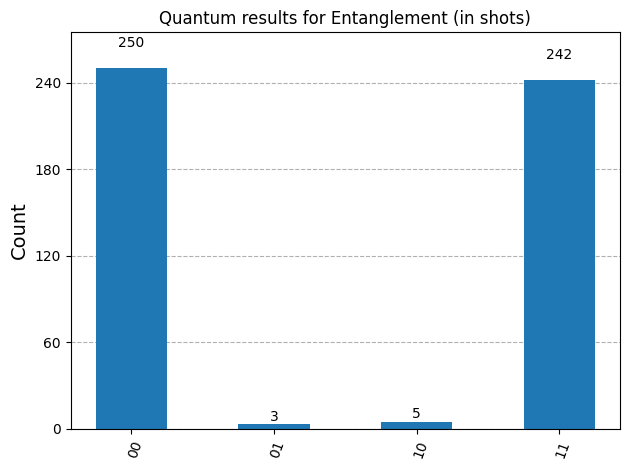

In [25]:
plot_histogram(counts_ideal, title="Quantum results for Entanglement (in shots)")